In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

import matplotlib as mpl
mpl.rcParams['axes.titlesize'] = 16
mpl.rcParams['axes.labelsize'] = 14
mpl.rcParams['legend.fontsize'] = 12
mpl.rcParams['xtick.labelsize'] = 12
mpl.rcParams['ytick.labelsize'] = 12
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False

# Exercise 01.1

## Part 1 

In this exercise I calculated the mean of the variable $r$ in the intervall $[0,1)$.
I extracted $M = 10^5$ random numbers uniformly in this intervall. In order to calculate also the uncertainties I used the blocking method dividing the $M$ numbers in $N = 100$ blocks.

Text(0.5, 1.0, '$<r>$ with error bars')

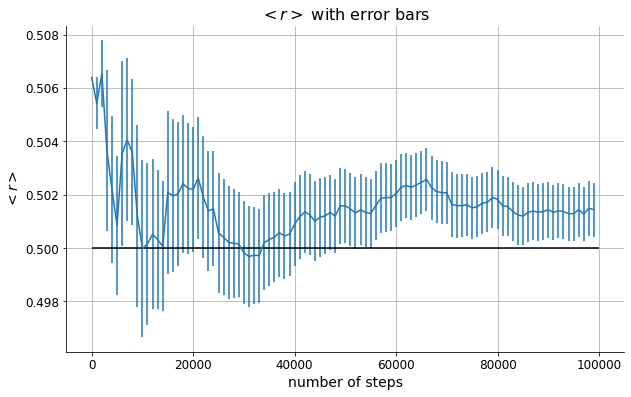

In [13]:
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
x, f, error = np.loadtxt("integrale_r.dat", usecols=(0,1,2), unpack='true')
ax.errorbar(x,f,yerr=error)
ax.hlines(0.5, 0, 100000)
ax.set_xlabel(r"number of steps")
ax.set_ylabel(r"$<r>$")
ax.grid(True)
ax.set_title(f"$<r>$ with error bars")

The result at the M-th step is not precisely $0.5$, not even if we count the error bar. Although if we try to repeat the experiment with a different initial seed of the pseudo-random number generator we can find that in that case the value $\langle r \rangle = 0.5$ is included in the error bar of the result in the last step. 

## Part 2 

In this second part the procedure to calculate the variance of $\langle r \rangle$, e.g. $\sigma^2 = \int_0^1 (r-1/2)^2 dr = 1/12$, is equal to the procedure of the first part. 

Text(0.5, 1.0, '$\\sigma^2$ with error bars')

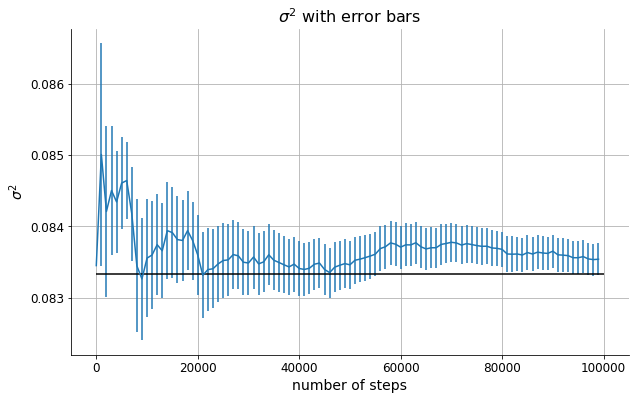

In [12]:
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
x, f, error = np.loadtxt("varianza_r.dat", usecols=(0,1,2), unpack='true')
ax.errorbar(x,f,yerr=error)
ax.set_xlabel(r"number of steps")
ax.set_ylabel(r"$\sigma^2$")
ax.hlines(1/12, 0, 100000)
ax.grid(True)
ax.set_title(f"$\sigma^2$ with error bars")

## Part 3

In this last part the first exercise the goal is to calculate the Pearson's cumulative test statistic $\chi^2$ in ordin to dimostrate that the random numbers extracted to calculate the mean of $r$ in the intervall $[0,1)$ and its variance are indeed extracted in this intervall in a uniform way.
In order to calculate $\chi^2$ initially I divided the intervall $[0,1]$ in $M = 100$ sub-intervall. Then, I extracted $n = 10^4$ numbers in the intervall $[0,1]$ and counted how many ended up in which particular sub-intervall ($n_i$). With this data in the end I calculated 
$$\chi^2 = \sum_{i=1}^M \frac{\left( n_i - n/M \right)^2}{n/M}$$
If the numbers are indeed extracted uniformly in this intervall the value of $(n_i - n/M)^2$ should be $\simeq n/M$ and so the total $\chi^2$ should be on average $\simeq 100$. This result can be seen in the following plot. 

Text(0.5, 1.0, '$\\chi^2$')

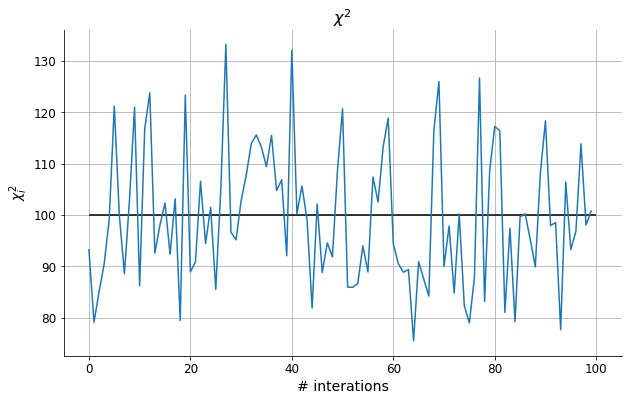

In [10]:
fig, ax = plt.subplots(1, 1, figsize=(10, 6))

x, f = np.loadtxt("chi2.dat", usecols=(0,1), unpack='true')
ax.plot(x,f)
ax.set_xlabel(r"# interations")
ax.set_ylabel(r"$\chi_i^2$")
ax.hlines(100, 0, 100)
ax.grid(True)
ax.set_title(f"$\chi^2$")

# Exercise 01.2

To fulfill the goal in this exercise I extracted $M= 10^4$ random number from an uniform distribution, an exponential distribution, $p(x) = \lambda \exp(-\lambda x)$ with $x\in [0;+\infty]$ and $\lambda = 1$,  and a lorentzian distribution,  $p(x)=\frac{1}{\pi}\frac{\Gamma}{(x-\mu)^2+\Gamma^2}$ with $x\in [-\infty;+\infty]$, $\Gamma = 1$ and $\mu = 0$.
For this last two distribution I used the method of the inversion of the cumulative distribution. 

For each distribution I calculated $S_N = \frac{1}{N}\sum_{i=1}^N x_i$ for $N=1, 2, 10, 100$ and plotted here in a histogram.

We can see that for the uniform and the exponential distribution the histogram of $S_N$ with $N=100$ is fitted by a Gaussian distribution according to the Central Limit Theorem. Instead for the lorentzian distribution this theorem does not apply and the histogram is always fitted by a Lorentzian distribution. 

In [6]:
#per fittare gli istogrammi con N=100
def gaussian(x, mu, sig):
    return np.exp(-((x - mu)**2)/(2*(sig**2)))/np.sqrt(2*np.pi*(sig**2))

def fit_gauss(x,mu,sigma):
    fit_x = np.array([
    gaussian(t,mu,sigma)
    for t in x
    ])
    return fit_x

def lorentzian(x, mu, gamma):
    return gamma/(np.pi*((x-mu)**2 + gamma**2))

def fit_lorentz(x,mu,gamma):
    fit_x = np.array([
    lorentzian(t,mu,gamma)
    for t in x
    ])
    return fit_x

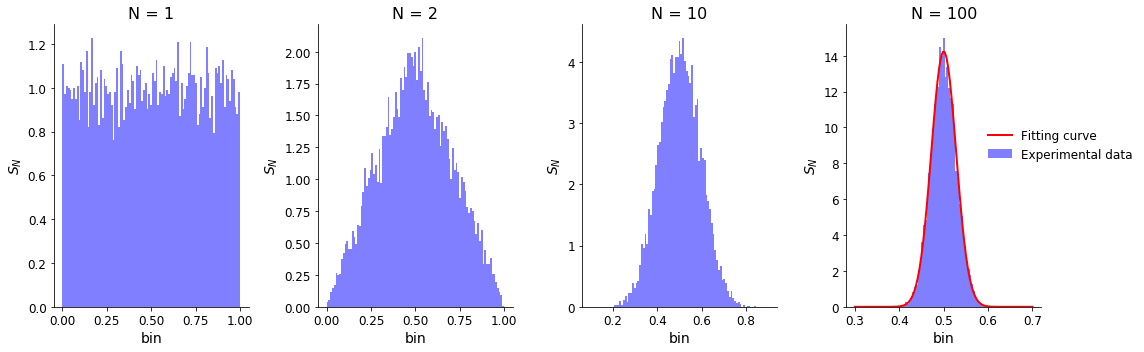

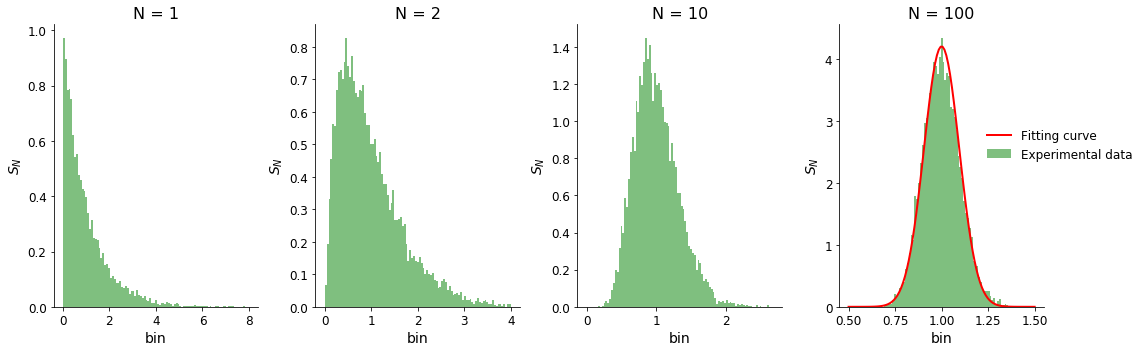

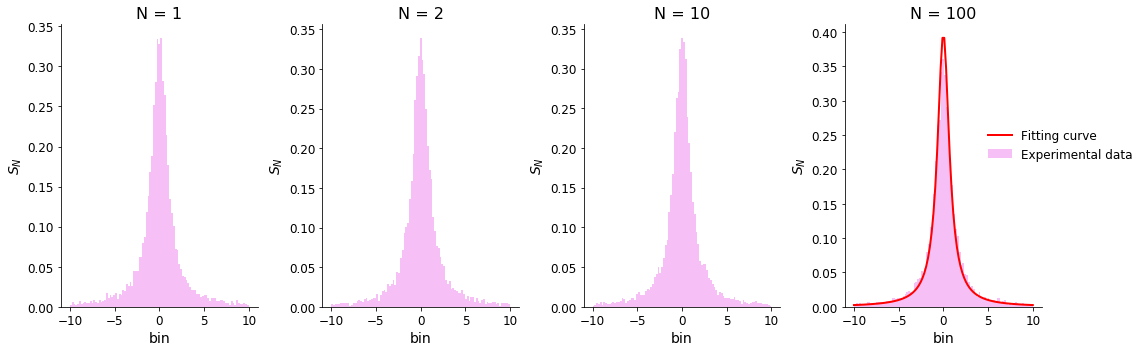

In [7]:
fig, axx = plt.subplots(1, 4, figsize=(16, 5), tight_layout=True)

n_bins = np.zeros((4,100))
x_dice = np.zeros((4,10000))
x_exp = np.zeros((4,10000))
x_lorentz = np.zeros((4,10000))
N  = np.zeros(4)
N = [1,2,10,100]
#standard dice
for i in range(4):
    x_dice[i,:] = np.loadtxt("standard_dice.txt", usecols=(i+1))

for i in range(4):
    ax = axx[i]
    if(i==0 or i==1): n_bins[i,:] = np.linspace(0, 1, num=100)
    if(i==2): n_bins[i,:] = np.linspace(0.1, 0.9, num=100)
    if(i==3): n_bins[i,:] = np.linspace(0.3, 0.7, num=100)
    ax.hist(x_dice[i,:], n_bins[i,:], density =1, facecolor = 'b', alpha =0.5, label = "Experimental data");
    ax.set_xlabel(r"bin")
    ax.set_ylabel(r"$S_N$")
    ax.set_title(f"N = {N[i]}")
    if(i==3): 
        ax.plot(n_bins[i,:], fit_gauss(n_bins[i,:],0.5,0.028),color="red",lw=2,label="Fitting curve")
        ax.legend(loc=(0.7, 0.5), frameon=False)

#exponential dice
fig, axx = plt.subplots(1, 4, figsize=(16, 5), tight_layout=True)

for i in range(4):
    x_exp[i,:] = np.loadtxt("exp_dice.txt", usecols=(i+1))

for i in range(4):
    ax = axx[i]
    n_bins[i,:] = np.linspace(0, 8/(i+1), num=100)
    if(i==3): n_bins[i,:] =  np.linspace(0.5, 1.5, num=100)
    ax.hist(x_exp[i,:], n_bins[i,:], density =1, facecolor = 'g', alpha =0.5, label = "Experimental data") 
    ax.set_xlabel(r"bin")
    ax.set_ylabel(r"$S_N$")
    ax.set_title(f"N = {N[i]}")
    if(i==3):
        ax.plot(n_bins[i,:], fit_gauss(n_bins[i,:],1,0.095),color="red",lw=2,label="Fitting curve") 
        ax.legend(loc=(0.7, 0.5), frameon=False)

#lorentzian dice
fig, axx = plt.subplots(1, 4, figsize=(16, 5), tight_layout=True)

for i in range(4):
    x_lorentz[i,:] = np.loadtxt("lorentz_dice.txt", usecols=(i+1))

for i in range(4):
    ax = axx[i]
    n_bins[i,:] = np.linspace(-10, 10, num=100)
    ax.hist(x_lorentz[i,:], n_bins[i,:], density =1, facecolor = 'violet', alpha =0.5, label = "Experimental data")
    if(i==3): 
        ax.plot(n_bins[i,:], fit_lorentz(n_bins[i,:],0,0.8),color="red",lw=2,label="Fitting curve")
        ax.legend(loc=(0.7, 0.5), frameon=False)
    ax.set_xlabel(r"bin")
    ax.set_ylabel(r"$S_N$")
    ax.set_title(f"N = {N[i]}")


# Exercise 01.3

To evalute $\pi$ with the Buffon's experiment I chose a needle of lenght $L=0.8$ and a spacing $d$ between the straight vertical lines of the ruled 2D plane, on which the needle falls, equal to $1$. 

First, I extracted $11x10^4$ random number distribuited uniformly in $[0,d)$ which correspond to the point on which the needle falls ($x_{fall}$). Subsequently, I used the accept-reject method to evaluate the inclination of the needle on the plane, but without calculating the angle: I extracted two other random numbers from the intervall $[-L,L)$ corrisponding to the $x$ and $y$ coordinate in a square of side $L$ and I accepted these coordinates only when $\sqrt{x^2 + y^2}<L^2$ until the total number of accepted coordinates reached $11x10^4$.For each of these accepted coordinates inside the circumference of radius $L$ I found the corrisponding $x$ coordinate **on** the circumference obtained by projecting the point $(x,y)$ along the radius with the following formula:
$$
x_{circ} = \frac{x L}{\sqrt{x^2 + y^2}}
$$
To evaluate $\pi$ I, first, counted the number of times $N_{hit}$ that $x_{circ} + x_{fall}$ was $\le 0$ or $\ge d$ (in fact, in these two cases the needle intersected the lines) and, then, calculated $\pi$ as $\frac{2LN_{throws}}{N_{hit}d}$ as a functios of the number of block $N=100$ dividing the total number of steps $M$.

The result is well in agreement with the correct value. 

Text(0.5, 1.0, "Buffon's experiment")

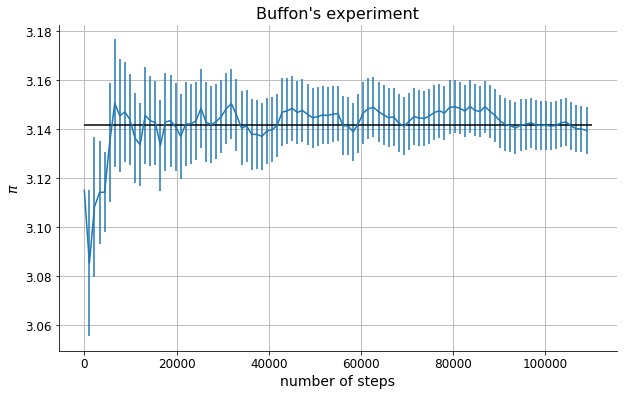

In [8]:
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
x, f, error = np.loadtxt("pigreco_buffon.dat", usecols=(0,1,2), unpack='true')
ax.errorbar(x,f,yerr=error)
ax.hlines(3.1415926, 0, 110000)
ax.set_xlabel(r"number of steps")
ax.set_ylabel(r"$\pi$")
ax.grid(True)
ax.set_title(f"Buffon's experiment")